# **Assignment 4**
# **Luminosity in solar-type stars**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

## **Part 1**

The stellar rotation is constrained by several factors such as mass, age, magnetic activity, internal structure, and disk presence.  Young stars exhibit inhomogeneous brightness on their surface. Hoffmeister (1965) was the first to suggest that these variations. are. due to. rotational. modulation by a dark. spot on the stellar surface.  These spots on the surface can be interpreted as due to magnetic activity, in the same way as in the Sun. These spots regulate the flux registered in the ground-based telescopes.

We will use light curves from ASAS project to determine the rotational. period of two young stars MML76 (K0IV, ~ 14Myr, Upper Centaurus Lupus) and PZTel (G9IV, ~11Myr, Beta Pictoris Moving Group). The Lomb-Scargle analysis will be performed on these datasets to obtain the rotational period.The Lomb-Scargle periodogram is a well-known algorithm for detecting and characterizing periodic signals in datasets.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy import timeseries

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sunspots.dat to sunspots.dat
Saving mml76_1.dat to mml76_1.dat
Saving pztel.dat to pztel.dat


In [4]:
# reading the datasets for 2 stars
pztel = pd.read_csv('pztel.dat', header=None, delim_whitespace=True)
mml76 = pd.read_csv('mml76_1.dat', header=None, delim_whitespace=True)

pztel.columns = ['hjd', 'magnitude']
mml76.columns = ['hjd', 'magnitude']

####Plotting the **light curves**, which show variations in luminosity:

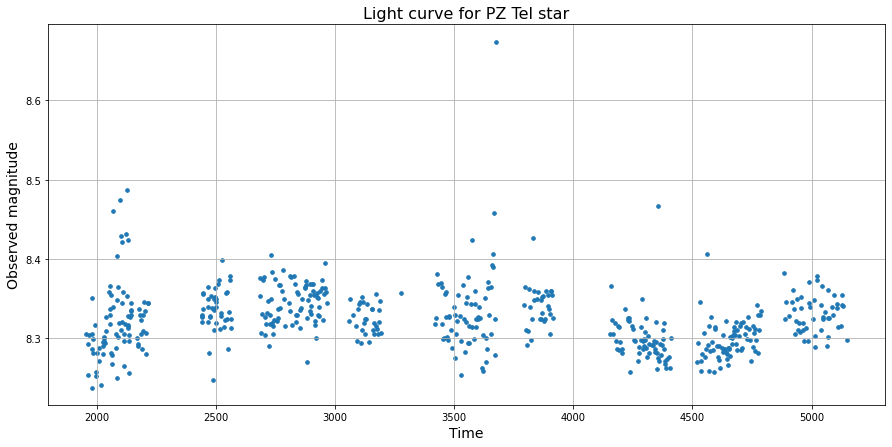

In [5]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(pztel['hjd'], pztel['magnitude'], s=13)
plt.title('Light curve for PZ Tel star', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Observed magnitude', fontsize=14)
plt.grid(True)
plt.show()

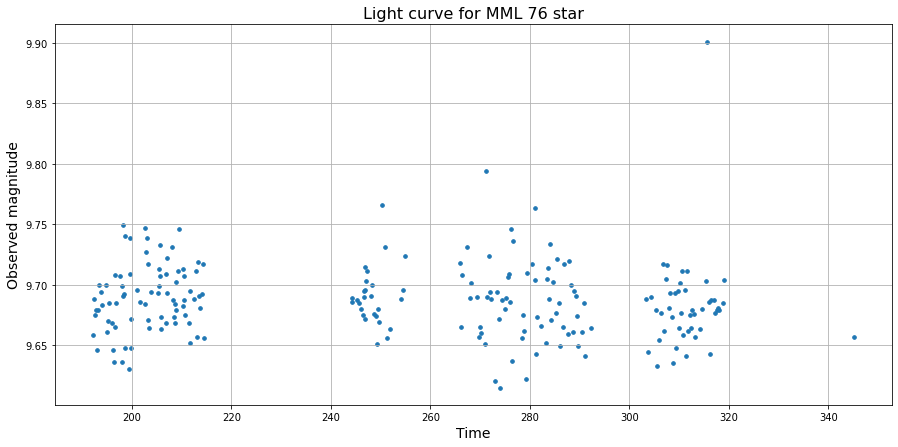

In [6]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(mml76['hjd'], mml76['magnitude'], s=13)
plt.title('Light curve for MML 76 star', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Observed magnitude', fontsize=14)
plt.grid(True)
plt.show()

**Now let's plot a periodogram for 2 stars** using Lomb-Scargle algorithm from AstroPy package.

####**PZ Tel:**

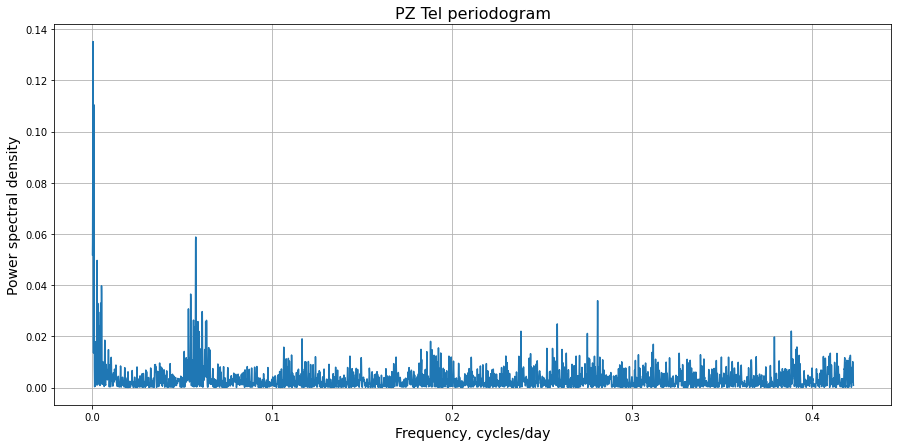

In [7]:
frequency, power = astropy.timeseries.LombScargle(pztel['hjd'], pztel['magnitude']).autopower() 

fig = plt.figure(figsize=(15, 7))
plt.plot(frequency, power)
plt.title('PZ Tel periodogram', fontsize=16)
plt.xlabel('Frequency, cycles/day', fontsize=14)
plt.ylabel('Power spectral density', fontsize=14)
plt.grid(True)
plt.show()

Let's find the value of Nyquist frequency of the largest peak different from zero:

In [8]:
freq_N = frequency[pd.Series(power)[100:].idxmax(axis=0)] # we excluded the beginining of plot near zero

In [9]:
print('Nyquist frequency of PZ Tel is {:.4f} cycles/day'.format(freq_N))

Nyquist frequency of PZ Tel is 0.0574 cycles/day


Now let's obtain period:

In [10]:
T = 1 / freq_N
print('For PZ Tel period is {:.2f} days'.format(T))

For PZ Tel period is 17.42 days


#### Next working with **MML 76** star:

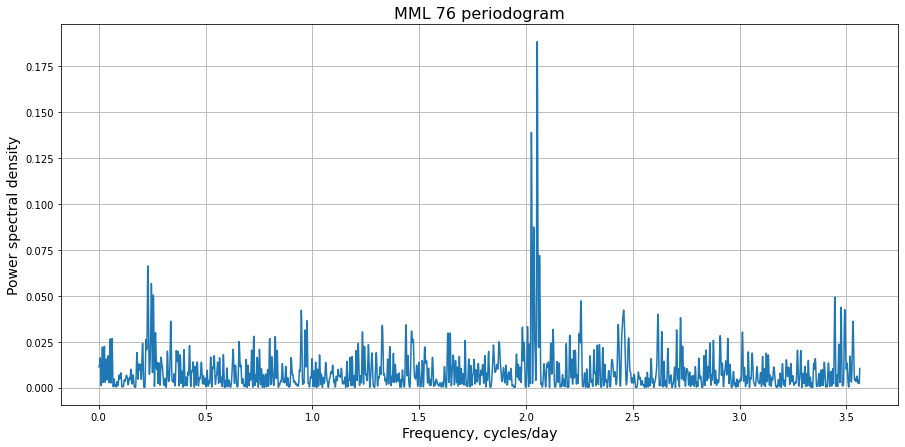

In [11]:
frequency, power = astropy.timeseries.LombScargle(mml76['hjd'], mml76['magnitude']).autopower()

fig = plt.figure(figsize=(15, 7))
plt.plot(frequency, power)
plt.title('MML 76 periodogram', fontsize=16)
plt.xlabel('Frequency, cycles/day', fontsize=14)
plt.ylabel('Power spectral density', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
freq_N = frequency[pd.Series(power)[:1000].idxmax(axis=0)] # looking for the first peak
print('Nyquist frequency of MML 76 is {:.2f} cycles/day'.format(freq_N))
print('For MML 76 period is {:.2f} days'.format(1/freq_N))

Nyquist frequency of MML 76 is 0.23 cycles/day
For MML 76 period is 4.33 days


####**Sun**

Working with dataset containing sunspots record numbers from 1700 to 1987.

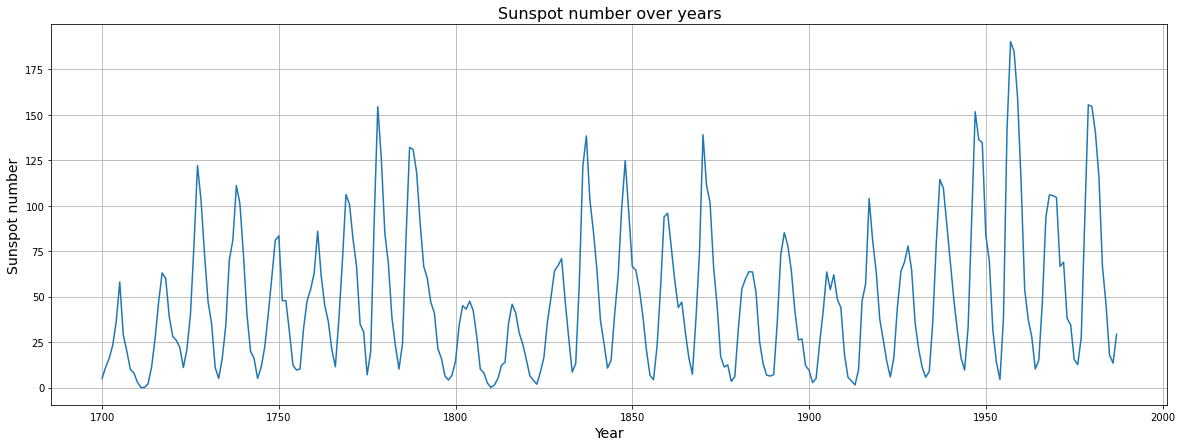

In [13]:
sunspot_num = pd.read_csv('sunspots.dat', header=None, delim_whitespace=True)
sunspot_num.columns = ['Year', 'S_number']

fig = plt.figure(figsize=(20, 7))
plt.plot(sunspot_num['Year'], sunspot_num['S_number'])
plt.title('Sunspot number over years', fontsize=16)
plt.ylabel('Sunspot number', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(True)
plt.show()

Obviously there's some periodicity in records. Let's find the Nyquist frequency and period:

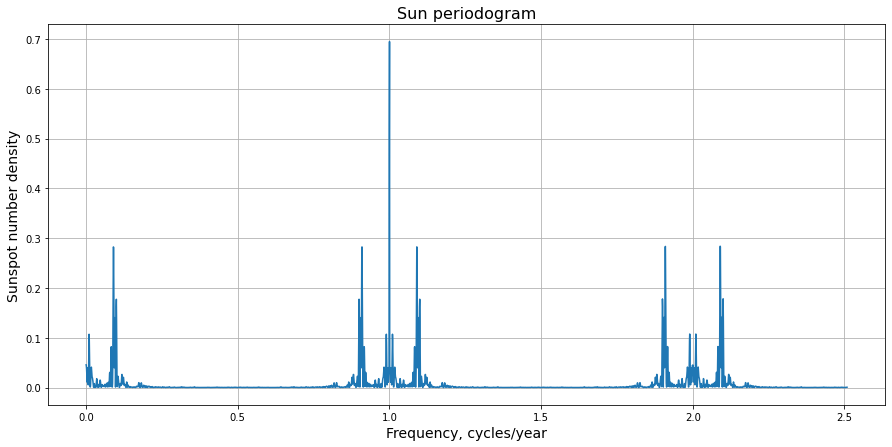

In [14]:
frequency, power = astropy.timeseries.LombScargle(sunspot_num['Year'], sunspot_num['S_number']).autopower()

fig = plt.figure(figsize=(15, 7))
plt.plot(frequency, power)
plt.title('Sun periodogram', fontsize=16)
plt.xlabel('Frequency, cycles/year', fontsize=14)
plt.ylabel('Sunspot number density', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
freq_N = frequency[pd.Series(power)[:200].idxmax(axis=0)] # looking for the first largest peak
print('Nyquist frequency of sunspot numbers is {:.2f} cycles/year'.format(freq_N))
print('For sunspot number period is {:.2f} years'.format(1/freq_N))

Nyquist frequency of sunspot numbers is 0.09 cycles/year
For sunspot number period is 11.08 years


####**Discussion:**

1-3. Let's compare properties of considered stars:

In [16]:
stars = pd.DataFrame(columns= ['Name', 'Age', 'Spectral type', 'Rotation period'], data = [
                     ['PZ Tel', '11 Myr', 'G9IV', '17.4 days'],
                     ['MML 76', '14 Myr', 'K0IV', '4.3 days'],
                     ['Sun', '4.6 billion years', 'G2V', '27 days']
          ])

stars


,Name,Age,Spectral type,Rotation period
0,PZ Tel,11 Myr,G9IV,17.4 days
1,MML 76,14 Myr,K0IV,4.3 days
2,Sun,4.6 billion years,G2V,27 days


The basic idea of gyrochronolgy is that the rotation period of a MS cool star is a deterministic function of its age and its mass or a color. Knowing relation of high luminosity to relatively young age, it can be stated that Young stars in general rotate rapidly, while old stars on average rotate slowly. Hotter stars spin faster than cool, main-sequence dwarfs because cool main-sequence stars experience magnetic braking and generally “spin down” over time.   
Here we see that the Sun (the oldest one in the table) has the biggest period (rotates slowly).  

4. Period obtained from sunspot number records is well-known 11-year solar cycle – periodic change in the Sun's activity measured in terms of variations in the number of observed sunspots on the solar surface. 
In addition to periodicity in sunspots, the dipolar magnetic field component of the Sun also flips every 11 years (with some lag from the sunspot number peak). Values of solar radiation and mass ejections, solar flares, coronal loops – all of them demonstrate a synchronized fluctuation with a period of 11 years.

5. The yellowish Sun has a B−V index of ~ 0.656 (B band is sensitive to blue light, and V is sensitive to visible green-yellow). It is positive so the Sun is considered to be a cold star (so called yellow dwarf).

## **Part 2**

The key to understanding the properties and. evolution of stars in the Hertzsprung-Russell (H-R) diagram, first studied around 1910.It plots the luminosity of stars along the ordinate and the color of stars along the abscissa. The nearest open cluster is the Hyades cluster and its HR diagram has been carefully studied for many years.

In [17]:
import math
from math import log10

Downloading a dataset of ~2719 Hipparcos stars which include many Hyadesmembers ~625Myr (age group) with distances 40-50pc.

In [18]:
uploaded = files.upload()

Saving HIP_star.dat to HIP_star.dat


In [22]:
hip_stars = pd.read_csv('HIP_star.dat', delim_whitespace=True)
#hip_stars.colums = ['hip', 'mag', 'ra', 'de', 'plx', 'pm_ra', 'pm_de', 'e_plx','b_v']
print(hip_stars)

        %HIP   Vmag          RA         DE    Plx    pmRA    pmDE  e_Plx    B-V
0          2   9.27    0.003797 -19.498837  21.90  181.21   -0.93   3.10  0.999
1         38   8.65    0.111047 -79.061831  23.84  162.30  -62.40   0.78  0.778
2         47  10.78    0.135192 -56.835248  24.45  -44.21 -145.90   1.97  1.150
3         54  10.57    0.151656  17.968956  20.97  367.14  -19.49   1.71  1.030
4         74   9.93    0.221873  35.752722  24.22  157.73  -40.31   1.36  1.068
...      ...    ...         ...        ...    ...     ...     ...    ...    ...
2673  118207   8.38  359.662248  77.262113  23.37   18.87  -44.04   0.70  0.651
2674  118213   8.28  359.690763  31.939823  20.33   76.66 -134.59   0.94  0.734
2675  118251   8.16  359.778318  41.170547  22.91   82.20    3.56   0.82  0.652
2676  118254   7.72  359.787381  41.201736  22.19   80.21    4.40   0.80  0.563
2677  118311  11.85  359.954685 -38.252603  24.63  337.76 -112.81   2.96  1.391

[2678 rows x 9 columns]


####**Plotting the HR diagram:**  
lg L = (15 – Vmag – 5 * lg(Plx)) / 2.5,   
where L is luminosity, Vmag is visual band magnitude (invertedlogarithmic measure of brightness) and Plx is parallactic angle (in milliarcseconds).  
Let's plot lg L vs B-V which is color index of star. 

In [23]:
lg_L = []

for i in range(len(hip_stars)):
  lg_L.append((15 - hip_stars.loc[i]['Vmag'] - 5 * log10(hip_stars.loc[i]['Plx'])) / 2.5)

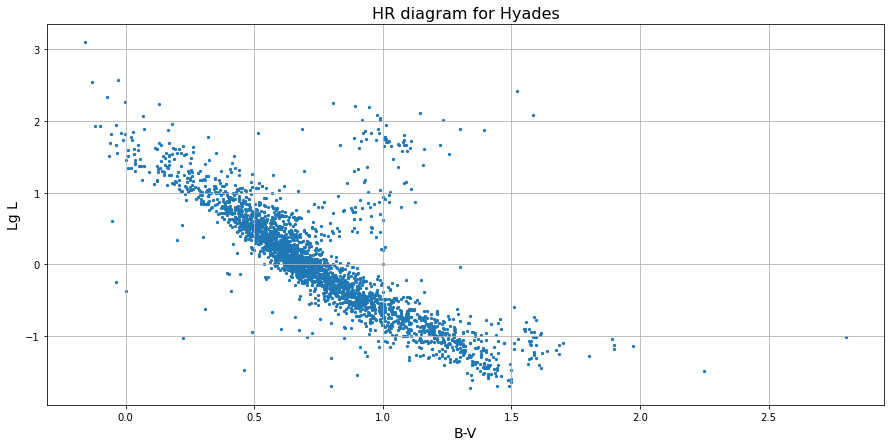

In [24]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(hip_stars['B-V'], lg_L, s=5)
plt.title('HR diagram for Hyades', fontsize=16)
plt.xlabel('B-V', fontsize=14)
plt.ylabel('Lg L', fontsize=14)
plt.grid(True)
plt.show()

Let's define how many stars are outside of the main sequence. MS is kind of a diagonal in HR so we'll build a line through group of points and define a maximum distance from a point to line (for stars inside of a MS). For the line I firstly obtained the coefficients by linear regression, but changed it manually a bit.  



In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(hip_stars['B-V']).reshape(-1, 1)
y = lg_L
model = LinearRegression().fit(x, y)

intercept = model.intercept_
slope = model.coef_

a = slope - 0.6
c = intercept + 0.35

In [26]:
x = np.arange(-0.5, 2, 0.1)
y = a * x + c

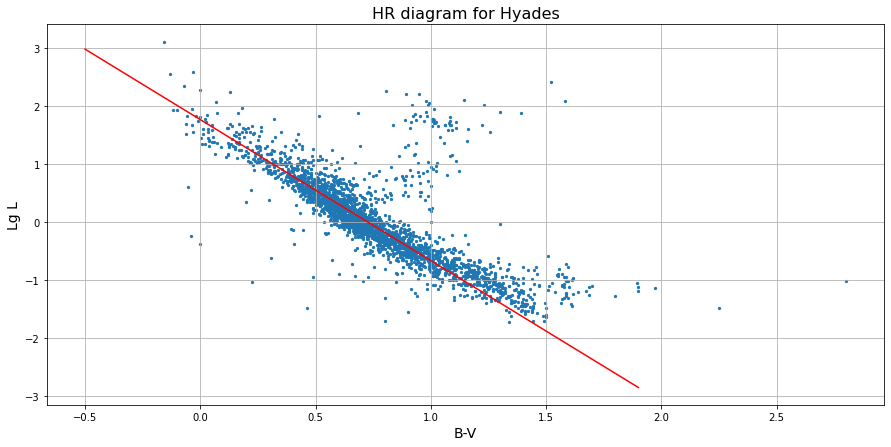

In [27]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(hip_stars['B-V'], lg_L, s=5)
plt.plot(x, y, color='r')
plt.title('HR diagram for Hyades', fontsize=16)
plt.xlabel('B-V', fontsize=14)
plt.ylabel('Lg L', fontsize=14)
plt.grid(True)
plt.show()

Now let's calculate the distance from every point to the red line and set a threshold on this value so that we can divide stars inside the MS and outside:

In [28]:
# built line is a*x - y + c =0

def shortest_distance(x1, y1, a, b, c):      
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return float(d)

In [29]:
lg_L_MS = []
b_v_MS = []

for i in range(len(hip_stars)):
    if shortest_distance(hip_stars.loc[i]['B-V'], lg_L[i], a, -1, c) < 0.25:
        lg_L_MS.append(lg_L[i])
        b_v_MS.append(hip_stars.loc[i]['B-V'])

Let's plot only inside stars:

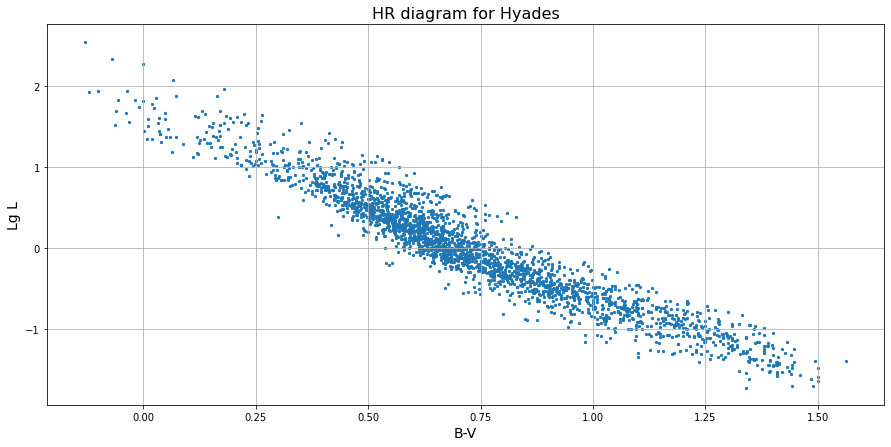

In [30]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(b_v_MS, lg_L_MS, s=5)
plt.title('HR diagram for Hyades', fontsize=16)
plt.xlabel('B-V', fontsize=14)
plt.ylabel('Lg L', fontsize=14)
plt.grid(True)
plt.show()

Now it is the MS with little number of outliers. Let's count how many stars from the whole dataset appear here:

In [31]:
print('{:.0%} stars are on the main sequence'.format(len(b_v_MS) / len(hip_stars)))
print('{:.0%} stars are outside the main sequence'.format(1 - len(b_v_MS) / len(hip_stars)))

92% stars are on the main sequence
8% stars are outside the main sequence


####**Discussion:**

Basically relationship between color index B-V (or temperature) and luminosity is displayed on the Hertzsprung–Russell diagram, a graphical tool that is used to classify stars according to their luminosity, spectral type, color, temperature and evolutionary stage. In the diagram most of the congregated stars (in the stable phase of hydrogen burning) are lying closely around a diagonal line called the main sequence (MS) according to their mass. MS is continuous – the luminosities fall off smoothly with decreasing surface temperature. Stellar evolution on the HR diagram: after a star uses up all the hydrogen in its core, it leaves the main sequence and moves towards the red giant branch. The most massive stars may also become red supergiants, in the upper right corner of the diagram. The lower left corner is reserved for the white dwarfs.
The more massive a star is, the shorter its lifespan on the MS.  

The MS can be explained mostly due to differences in temperature: hot stars fall on the upper left, cool stars on the lower right portion of the sequence. Also stars hotter than the Sun are apparently a bit larger than the Sun, and cooler stars are a bit smaller. 

The color index of a star gives its temperature. The smaller the color index, the more blue (or hotter) the star is. Conversely, the larger the color index, the more red (or cooler) the star is. This is a consequence of the logarithmic magnitude scale, in which brighter objects have smaller (more negative) magnitudes than dimmer ones. B-V index is a blue (B) filter and a greenish filter (V - visual). Hot stars have negative B-V index and cool stars have positive one.
Also spectral types can be visualized in HR: from O in the left side to M on the right.

In the last step we obtained that 92% of the considered stars are located on the MS. That means that most of the stars in given dataset (Hyades) are not so old, they didn't turn to giants or dwarfs yet. What is actually true, the age of the cluster is ~625 Myr.

####**Learning log:**

This assignment was quite challenging for us due to lots of new information on stars, their classification, evolution and its representation. We've become familiar with Lomb-Scargle algorithm, B-V color index and Hertzsprung-Russell diagram.   
We've obtained the rotational period from dated magnitude fluctuations for 3 stars including the Sun and considered it taking into account the age of stars.  
We've managed to define a Main Sequence in a HR for Hyades cluster and calculate the fraction of stars located on MS to characterize the stage of stars' evolution.